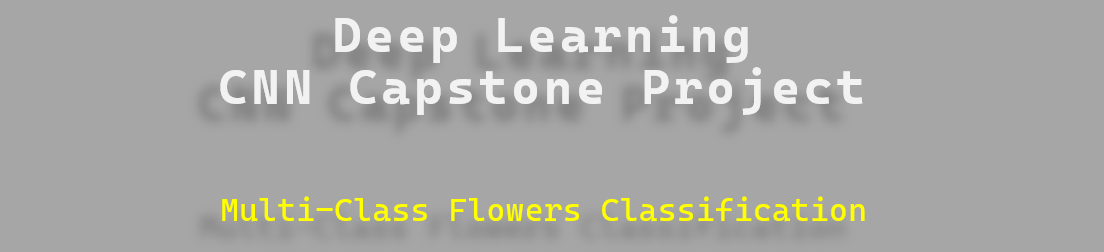

# Loading Library and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
my_data_dir='/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)'
os.listdir(my_data_dir)

['test', 'train']

In [4]:
train_path = ('/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)/train')
test_path =('/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)/test')

print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['dandelion', 'roses', 'daisy', 'sunflowers', 'tulips']


# EDA

In [5]:
import os
from sklearn.model_selection import train_test_split

# Veri dizininizi belirtin
my_data_dir = '/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)'  # Gerçek veri dizininizi buraya girin

# Sınıf isimlerini alın
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Tüm görüntü yollarını ve etiketleri toplayın
train_image_paths = []
test_image_paths = []
train_labels = []
test_labels = []

for class_name in classes:
    # Eğitim veri yollarını ve etiketlerini toplayın
    train_class_dir = os.path.join(my_data_dir, 'train', class_name)
    train_class_image_paths = [os.path.join(train_class_dir, fname) for fname in os.listdir(train_class_dir) if fname.endswith('.jpg')]
    train_image_paths += train_class_image_paths
    train_labels += [class_name] * len(train_class_image_paths)

    # Test veri yollarını ve etiketlerini toplayın
    test_class_dir = os.path.join(my_data_dir, 'test', class_name)
    test_class_image_paths = [os.path.join(test_class_dir, fname) for fname in os.listdir(test_class_dir) if fname.endswith('.jpg')]
    test_image_paths += test_class_image_paths
    test_labels += [class_name] * len(test_class_image_paths)

# Eğitim ve test setlerini yazdırın
print(f"Training set: {len(train_image_paths)} images")
print(f"Test set: {len(test_image_paths)} images")


Training set: 2936 images
Test set: 734 images


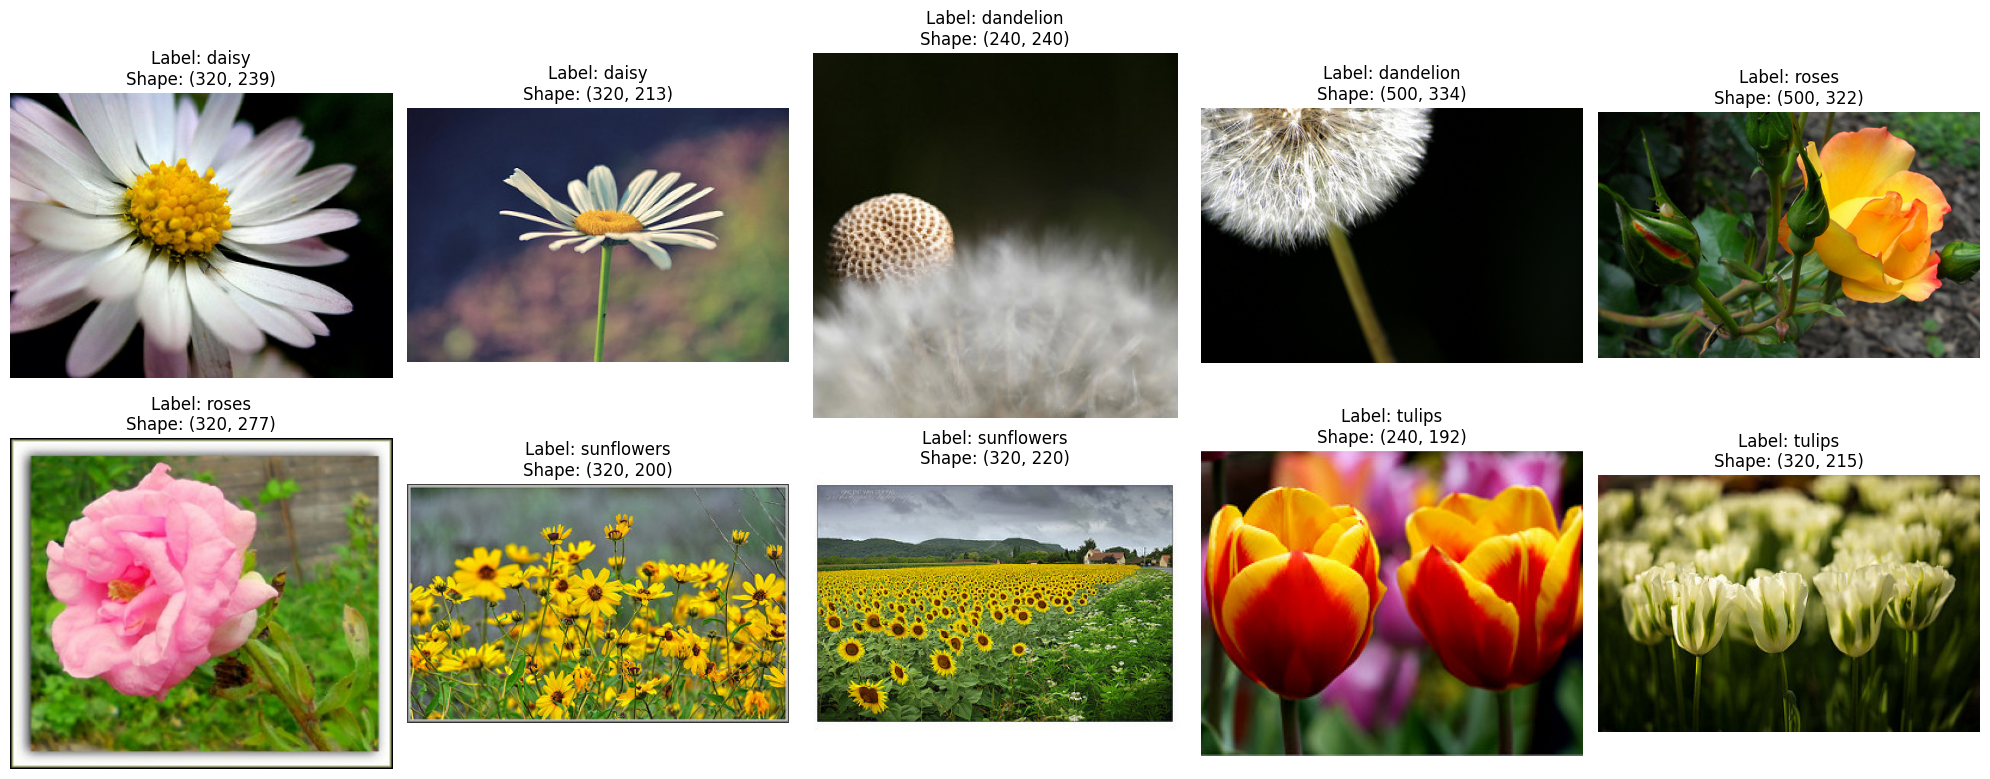

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Her sınıftan iki resim seçin
selected_image_paths = []
selected_labels = []

for class_name in classes:
    class_image_paths = [path for path, label in zip(train_image_paths, train_labels) if label == class_name][:2]
    class_labels = [class_name] * 2
    selected_image_paths += class_image_paths
    selected_labels += class_labels

# Seçilen resimleri yükleyin ve görselleştirin
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, (img_path, label) in enumerate(zip(selected_image_paths, selected_labels)):
    img = Image.open(img_path)

    # Resmi görselleştirin
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].set_title(f"Label: {label}\nShape: {img.size}")
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from PIL import Image

# Seçilen bir resim yolunu belirleyin (örneğin, seçilen resim yollarından ilki)
img_path = selected_image_paths[0]

# Resmi yükleyin
img = Image.open(img_path)

# Resmi bir numpy dizisine dönüştürün
img_array = np.array(img)

# Dizinin maksimum ve minimum değerlerini bulun
max_value = img_array.max()
min_value = img_array.min()

# Maksimum ve minimum değerleri yazdırın
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")



Max value: 255
Min value: 0


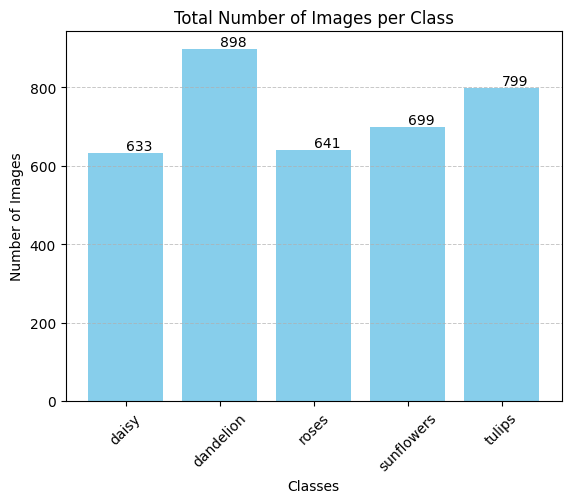

In [ ]:
import os
import matplotlib.pyplot as plt

# Her sınıf için toplam resim sayısını hesaplayın
my_data_dir = '/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)'
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
total_counts = []

for class_name in classes:
    train_class_dir = os.path.join(my_data_dir, 'train', class_name)
    test_class_dir = os.path.join(my_data_dir, 'test', class_name)

    train_num_images = len([fname for fname in os.listdir(train_class_dir) if fname.endswith('.jpg')])
    test_num_images = len([fname for fname in os.listdir(test_class_dir) if fname.endswith('.jpg')])

    total_num_images = train_num_images + test_num_images
    total_counts.append(total_num_images)

# Toplam resim sayılarını bir bar plot ile gösterin
bars = plt.bar(classes, total_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Barlar üzerinde değerleri gösterin
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment

plt.show()

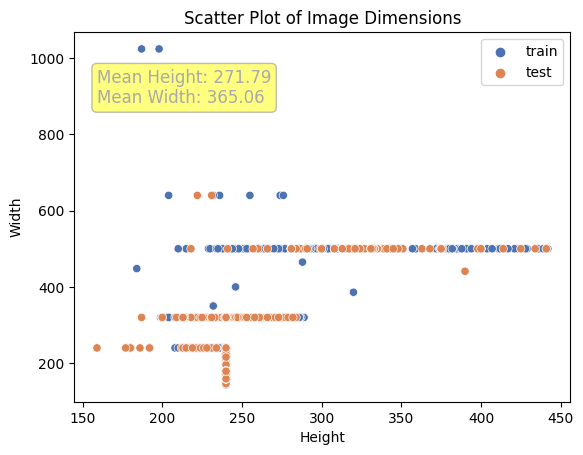

In [ ]:
import seaborn as sns
from skimage.io import imread
import os
import matplotlib.pyplot as plt
import numpy as np

my_data_dir = '/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers/flower_photos.rar (Unzipped Files)'
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

x = []
y = []
hue = []

for data_type in ['train', 'test']:
    for class_name in classes:
        class_dir = os.path.join(my_data_dir, data_type, class_name)

        for image_name in os.listdir(class_dir):
            if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
                img = imread(os.path.join(class_dir, image_name))
                d1, d2, colors = img.shape
                x.append(d1)
                y.append(d2)
                hue.append(data_type)

# Ortalama boyutları hesaplayın
mean_x = np.mean(x)
mean_y = np.mean(y)

sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Scatter Plot of Image Dimensions')

# Ortalama boyutları scatter plot'a ekleyin
textstr = f'Mean Height: {mean_x:.2f}\nMean Width: {mean_y:.2f}'
plt.text(min(x), max(y) - max(y)*0.05, textstr, fontsize=12, ha='left', va='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5, edgecolor='gray'),
         color='darkgray')

plt.show()

# PreProcessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri dizinlerini belirtin
train_dir = os.path.join(my_data_dir, 'train')
test_dir = os.path.join(my_data_dir, 'test')

# Resim şekli ve batch size belirtin
image_shape = (224, 224, 3)
batch_size = 32

# ImageDataGenerator nesnesini oluşturun
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

# Eğitim ve test veri setlerini oluşturun
train_image_gen = image_gen.flow_from_directory(train_dir,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)


Found 2936 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [7]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.7 MB/s eta 0:00:00


# CNN Model with `EfficientNetV2S ` and ` ReduceLROnPlateau `

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import applications
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision  # Ekstra import

# Mixed precision kullanımını etkinleştir
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Veri seti boyutları ve sınıf sayısı
image_shape = (224, 224, 3)
num_classes = 5

# Önceden eğitilmiş EfficientNetV2-S modelini yükle
pretrained_model = applications.EfficientNetV2S(include_top=False,
                                                weights="imagenet",
                                                input_shape=image_shape,
                                                pooling='avg')

# Tüm önceden eğitilmiş katmanları dondur
for layer in pretrained_model.layers[-20:]:  # Son 5 katmanı eğitime açık hale getir
    layer.trainable = True

# Yeni bir model oluştur ve önceden eğitilmiş EfficientNetV2-S modelini ekle
model = Sequential()
model.add(pretrained_model)

model.add(Dense(1024, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Adam optimizer kullan
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Callbacks tanımlanıyor
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('CNN_Flowers_EfficientNetV2S_trial_6.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Learning rate'yi azaltan callback
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, verbose=1, min_lr=1e-6)

callbacks = [early_stop, checkpoint]

# Model derleniyor
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Model özeti
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 1280)              20331360  
 al)                                                             
                                                                 
 dense_21 (Dense)            (None, 1024)              1311744   
                                                                 
 batch_normalization_7 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dropout_15 (Dropout)        (None, 512)              

In [26]:
results = model.fit(train_image_gen,  # Eğitim verileri üreteci
                    epochs=50,
                    validation_data= test_image_gen,  # Doğrulama verileri üreteci
                    callbacks=callbacks)  # Geri aramalar

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 2.1183 - accuracy: 0.3191
Epoch 1: val_loss improved from inf to 1.29013, saving model to CNN_Flowers_EfficientNetV2S_trial_6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 546s 5s/step - loss: 2.1183 - accuracy: 0.3191 - val_loss: 1.2901 - val_accuracy: 0.5954
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.2846 - accuracy: 0.5416
Epoch 2: val_loss improved from 1.29013 to 0.89189, saving model to CNN_Flowers_EfficientNetV2S_trial_6.h5
92/92 [==============================] - 171s 2s/step - loss: 1.2846 - accuracy: 0.5416 - val_loss: 0.8919 - val_accuracy: 0.7684
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.6795
Epoch 3: val_loss improved from 0.89189 to 0.59656, saving model to CNN_Flowers_EfficientNetV2S_trial_6.h5
92/92 [==============================] - 172s 2s/step - loss: 0.9149 - accuracy: 0.6795 - val_loss: 0.5966 - val_accuracy: 0.8270
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.7331 - accuracy: 0.7418
Epoch 4: val_loss improved from 0.59656 to 0.44338, saving model to CNN_Flowers_EfficientNetV2S_trial_6.h5
92/92 [

In [27]:
from tensorflow.keras.models import load_model
model.save('CNN_Flowers_EfficientNetV2S_trial_6_eonb.h5')

In [28]:
import pickle

# Eğitim sürecinde History nesnesini kaydetme
with open('training_history.pkl', 'wb') as f:
    pickle.dump(results.history, f)

"""with open('CNN_Flowers_EfficientNetV2S_trial_6_eonb.pkl', 'rb') as f:
    model_history = pickle.load(f)

print(model_history.keys())"""

"with open('CNN_Flowers_EfficientNetV2S_trial_6_eonb.pkl', 'rb') as f:\n    model_history = pickle.load(f)\n\nprint(model_history.keys())"

In [ ]:
#!pip install tensorflow-addons

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

# Modeli yükleyin
model = load_model("CNN_Flowers_EfficientNetV2_S_trial_4_eonb.h5")

## Evaluating Model

In [29]:
ts_length = len(test_image_gen)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_image_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_image_gen, steps=test_steps, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 1s 1s/step - loss: 0.0471 - accuracy: 1.0000
Train Loss:  0.00024437904357910156
Train Accuracy:  1.0
--------------------
Test Loss:  0.04705810546875
Test Accuracy:  1.0


23/23 [==============================] - 35s 1s/step


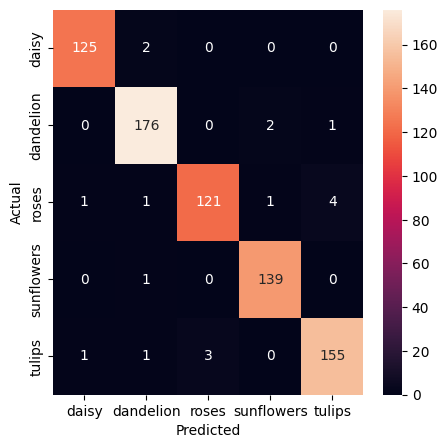

              precision    recall  f1-score   support

       daisy       0.98      0.98      0.98       127
   dandelion       0.97      0.98      0.98       179
       roses       0.98      0.95      0.96       128
  sunflowers       0.98      0.99      0.99       140
      tulips       0.97      0.97      0.97       160

    accuracy                           0.98       734
   macro avg       0.98      0.97      0.98       734
weighted avg       0.98      0.98      0.98       734



In [30]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model and get predictions
#model = load_model('CNN_Flowers_best_model_trial_2_eonb.keras')
y_pred = model.predict(test_image_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels and class labels
y_true = test_image_gen.classes
class_labels = list(test_image_gen.class_indices.keys())

# Create confusion matrix and classification report
conf_mat = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Visualize the results
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(class_report)

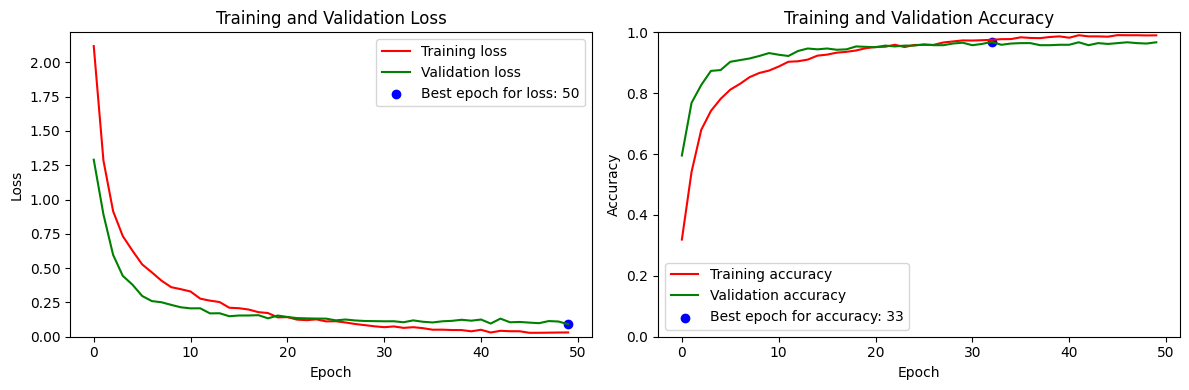

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Gerekli değişkenleri tanımlayın
tr_acc = results.history['accuracy']
tr_loss = results.history['loss']
val_acc = results.history['val_accuracy']
val_loss = results.history['val_loss']

# En iyi epochları bulun
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

# Eğitim sonuçlarını çizin
plt.figure(figsize=(12, 4))

# Kayıp (loss) grafiğini çizin
plt.subplot(1, 2, 1)
plt.plot(tr_loss, 'r', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.scatter(index_loss, val_loss[index_loss], c='blue', label=f'Best epoch for loss: {index_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(max(val_loss), max(tr_loss)) + 0.1)  # Loss değerlerini dinamik olarak sınırlayın
plt.legend()

# Doğruluk (accuracy) grafiğini çizin
plt.subplot(1, 2, 2)
plt.plot(tr_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'g', label='Validation accuracy')
plt.scatter(index_acc, val_acc[index_acc], c='blue', label=f'Best epoch for accuracy: {index_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
train_proba = model.predict(X_train)
train_prediction = np.argmax(train_proba, axis=1)

val_proba = model.predict(X_test)
val_prediction = np.argmax(val_proba, axis=1)

print("TEST RESULTS")
print(confusion_matrix(y_test, val_prediction))
print(classification_report(y_test, val_prediction))
print("------------------------------")
print("TRAIN RESULTS")
print(confusion_matrix(y_train, train_prediction))
print(classification_report(y_train, train_prediction))

# Back up Codes and Notes

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri dizinlerini belirtin
train_dir = os.path.join(my_data_dir, 'train')
test_dir = os.path.join(my_data_dir, 'test')

# Resim şekli ve batch size belirtin
image_shape = (224, 224, 3)
batch_size = 32

# ImageDataGenerator nesnesini oluşturun
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                               )

# Eğitim ve test veri setlerini oluşturun
train_image_gen = image_gen.flow_from_directory(train_dir,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False)

test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 2936 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


92/92 [==============================] - 45s 492ms/step


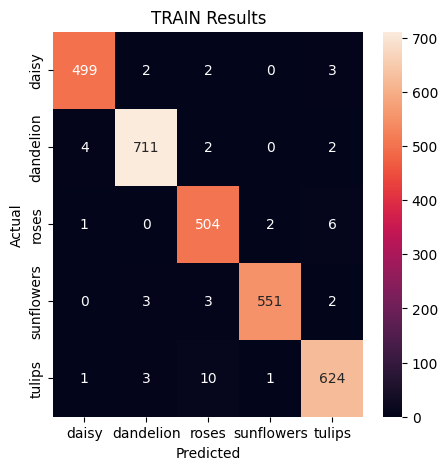

              precision    recall  f1-score   support

       daisy       0.99      0.99      0.99       506
   dandelion       0.99      0.99      0.99       719
       roses       0.97      0.98      0.97       513
  sunflowers       0.99      0.99      0.99       559
      tulips       0.98      0.98      0.98       639

    accuracy                           0.98      2936
   macro avg       0.98      0.98      0.98      2936
weighted avg       0.98      0.98      0.98      2936

23/23 [==============================] - 12s 515ms/step


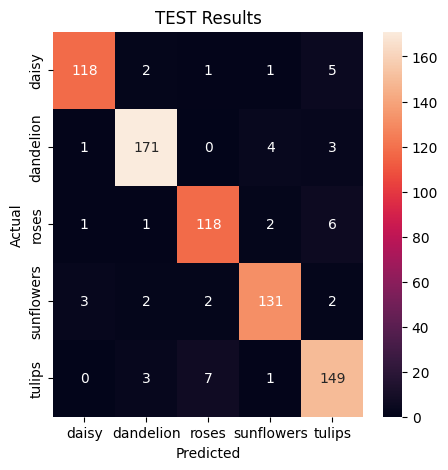

              precision    recall  f1-score   support

       daisy       0.96      0.93      0.94       127
   dandelion       0.96      0.96      0.96       179
       roses       0.92      0.92      0.92       128
  sunflowers       0.94      0.94      0.94       140
      tulips       0.90      0.93      0.92       160

    accuracy                           0.94       734
   macro avg       0.94      0.93      0.94       734
weighted avg       0.94      0.94      0.94       734



In [36]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results(image_gen, model, set_name):
    # Predictions
    y_pred = model.predict(image_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # True labels and class labels
    y_true = image_gen.classes
    class_labels = list(image_gen.class_indices.keys())

    # Confusion matrix and classification report
    conf_mat = confusion_matrix(y_true, y_pred_classes)
    class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)

    # Visualize results
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_mat, annot=True, fmt="d",
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'{set_name} Results')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(class_report)

# Assuming you have train_image_gen and test_image_gen for training and test data respectively
# model = load_model('your_model_path_here.keras')
plot_results(train_image_gen, model, "TRAIN")
plot_results(test_image_gen, model, "TEST")


In [38]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Model tahminleri
train_proba = model.predict(train_image_gen)
train_prediction = np.argmax(train_proba, axis=1)

val_proba = model.predict(test_image_gen)
val_prediction = np.argmax(val_proba, axis=1)

# Doğru etiketler ve sınıf etiketleri
y_train_true = train_image_gen.classes
y_val_true = test_image_gen.classes
class_labels = list(test_image_gen.class_indices.keys())

# Confusion matris ve classification report hesaplama ve yazdırma
print("TEST RESULTS")
print(confusion_matrix(y_val_true, val_prediction))
print(classification_report(y_val_true, val_prediction, target_names=class_labels))

print("------------------------------")

print("TRAIN RESULTS")
print(confusion_matrix(y_train_true, train_prediction))
print(classification_report(y_train_true, train_prediction, target_names=class_labels))


23/23 [==============================] - 11s 501ms/step
TEST RESULTS
[[117   4   0   0   6]
 [  1 170   1   3   4]
 [  1   2 118   2   5]
 [  1   2   1 134   2]
 [  0   2   8   2 148]]
              precision    recall  f1-score   support

       daisy       0.97      0.92      0.95       127
   dandelion       0.94      0.95      0.95       179
       roses       0.92      0.92      0.92       128
  sunflowers       0.95      0.96      0.95       140
      tulips       0.90      0.93      0.91       160

    accuracy                           0.94       734
   macro avg       0.94      0.93      0.94       734
weighted avg       0.94      0.94      0.94       734

------------------------------
TRAIN RESULTS
[[501   2   1   0   2]
 [  4 710   4   1   0]
 [  0   1 505   1   6]
 [  0   3   2 552   2]
 [  2   4   7   0 626]]
              precision    recall  f1-score   support

       daisy       0.99      0.99      0.99       506
   dandelion       0.99      0.99      0.99       719
  

# CNN Model with ` GlobalAveragePooling2D()`

In [47]:
test_df = pd.read_csv("/content/trained_model_predictions.csv")
test_df

,prediction
0,daisy
1,tulips
2,daisy
3,daisy
4,daisy
...,...
729,daisy
730,tulips
731,tulips
732,tulips


In [46]:
import pandas as pd
from tensorflow.keras.preprocessing import image
import numpy as np

# Test setini yükle
test_df = pd.read_csv("/content/Testing_set_flower.csv")

# Tahminleri yapmak için resimleri yükle ve ön işle
images = []
for img_path in test_df["prediction"]:
    img = image.load_img(img_path, target_size=(img_height, img_width))  # img_height ve img_width modelin giriş boyutları olmalıdır
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model tek bir resim için (1, height, width, channels) boyutlarını bekler
    images.append(img_array)

images = np.vstack(images)

# Tahminleri al
prediction = model.predict(images)
class_labels = list(test_image_gen.class_indices.keys())
predicted_classes = [class_labels[np.argmax(prediction[i])] for i in range(len(prediction))]

# Tahminleri bir DataFrame'e ekleyin
submission = pd.DataFrame({"prediction": predicted_classes})

# DataFrame'i CSV dosyası olarak kaydet
submission.to_csv("trained_model_predictions.csv", index=False)


KeyError: ignored

In [ ]:
# Trial_3

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

model = Sequential()

# İlk katman
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 input_shape=image_shape,
                 padding='same',
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Ek katmanlar
filters = [128, 256]
for filter in filters:
    model.add(Conv2D(filters=filter,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu',
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

# Global Average Pooling katmanı
## model.add(Flatten())
model.add(GlobalAveragePooling2D())


# Tam bağlantılı katman
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Çıkış katmanı
model.add(Dense(5, activation='softmax'))

# Optimizer olarak Adam kullanılıyor
opt = tfa.optimizers.RectifiedAdam(learning_rate=0.01) # AdamW için

# Define a custom learning rate schedule function
def cyclical_learning_rate(epoch, lr):
    if epoch % 6 == 0:  # Adjust the cycle length as needed
        lr = lr * 10  # Increase learning rate
    return lr

# Callbacks tanımlanıyor
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoint = ModelCheckpoint('CNN_Flowers_best_model_trial_4.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min',
                             save_format='h5')

lr_scheduler = LearningRateScheduler(cyclical_learning_rate)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

callbacks = [early_stop, checkpoint, lr_scheduler]


# Model derleniyor
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Model özeti
model.summary()

In [ ]:
print(tf.__version__)


In [ ]:
results = model.fit(train_image_gen,  # Eğitim verileri üreteci
                    epochs=50,
                    validation_data= test_image_gen,  # Doğrulama verileri üreteci
                    callbacks=callbacks)  # Geri aramalar

## Loading Model and Training History

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers'))


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/01_DL_CNN_Capstone_Project_MultiClass_Flowers')

In [ ]:
import pickle

with open('CNN_Flowers_best_model_trial_4_eonb.pkl', 'rb') as f:
    model_history = pickle.load(f)

print(model_history.keys())

In [ ]:
#!pip install tensorflow-addons

In [ ]:
"""from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

# Modeli yükleyin
model = load_model("CNN_Flowers_best_model_trial_4.h5")"""

## Evaluating Model

In [ ]:
ts_length = len(test_image_gen)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_image_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_image_gen, steps=test_steps, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model and get predictions
#model = load_model('CNN_Flowers_best_model_trial_2_eonb.keras')
y_pred = model.predict(test_image_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels and class labels
y_true = test_image_gen.classes
class_labels = list(test_image_gen.class_indices.keys())

# Create confusion matrix and classification report
conf_mat = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Visualize the results
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(class_report)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerekli değişkenleri tanımlayın
tr_acc = model_history['accuracy']
tr_loss = model_history['loss']
val_acc = model_history['val_accuracy']
val_loss = model_history['val_loss']

# En iyi epochları bulun
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

# Eğitim sonuçlarını çizin
plt.figure(figsize=(12, 4))

# Kayıp (loss) grafiğini çizin
plt.subplot(1, 2, 1)
plt.plot(tr_loss, 'r', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.scatter(index_loss, val_loss[index_loss], c='blue', label=f'Best epoch for loss: {index_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(max(val_loss), max(tr_loss)) + 0.1)  # Loss değerlerini dinamik olarak sınırlayın
plt.legend()

# Doğruluk (accuracy) grafiğini çizin
plt.subplot(1, 2, 2)
plt.plot(tr_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'g', label='Validation accuracy')
plt.scatter(index_acc, val_acc[index_acc], c='blue', label=f'Best epoch for accuracy: {index_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerekli değişkenleri tanımlayın
tr_acc = results['accuracy']
tr_loss = results['loss']
val_acc = results['val_accuracy']
val_loss = results['val_loss']

# En iyi epochları bulun
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

# Eğitim sonuçlarını çizin
plt.figure(figsize=(12, 4))

# Kayıp (loss) grafiğini çizin
plt.subplot(1, 2, 1)
plt.plot(tr_loss, 'r', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.scatter(index_loss, val_loss[index_loss], c='blue', label=f'Best epoch for loss: {index_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(max(val_loss), max(tr_loss)) + 0.1)  # Loss değerlerini dinamik olarak sınırlayın
plt.legend()

# Doğruluk (accuracy) grafiğini çizin
plt.subplot(1, 2, 2)
plt.plot(tr_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'g', label='Validation accuracy')
plt.scatter(index_acc, val_acc[index_acc], c='blue', label=f'Best epoch for accuracy: {index_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerekli değişkenleri tanımlayın
tr_acc = results.history['accuracy']
tr_loss = results.history['loss']
val_acc = results.history['val_accuracy']
val_loss = results.history['val_loss']

# En iyi epochları bulun
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

# Eğitim sonuçlarını çizin
plt.figure(figsize=(12, 4))

# Kayıp (loss) grafiğini çizin
plt.subplot(1, 2, 1)
plt.plot(tr_loss, 'r', label='Training loss')
plt.plot(val_loss, 'g', label='Validation loss')
plt.scatter(index_loss, val_loss[index_loss], c='blue', label=f'Best epoch for loss: {index_loss+1}')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(max(val_loss), max(tr_loss)) + 0.1)  # Loss değerlerini dinamik olarak sınırlayın
plt.legend()

# Doğruluk (accuracy) grafiğini çizin
plt.subplot(1, 2, 2)
plt.plot(tr_acc, 'r', label='Training accuracy')
plt.plot(val_acc, 'g', label='Validation accuracy')
plt.scatter(index_acc, val_acc[index_acc], c='blue', label=f'Best epoch for accuracy: {index_acc+1}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()
